In [1152]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer




In [1153]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("test.csv")

# preview train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1154]:
# Check for missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1155]:
# Check % of missing values
train_df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<AxesSubplot: >

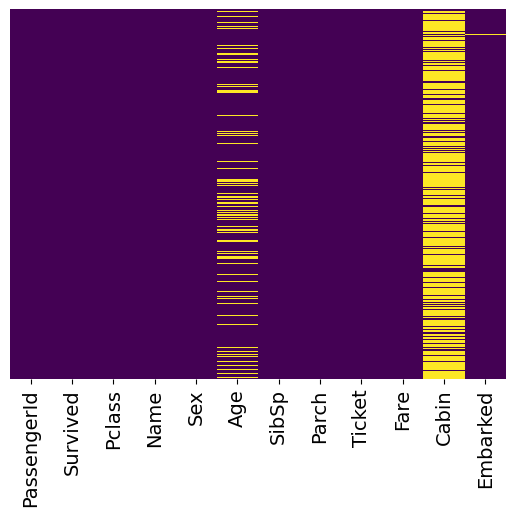

In [1156]:
# Visualize missing data and check for relationship with other variables
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap= 'viridis')

In [1157]:
# Remove missing values from Embared column from test data
test_df['Embarked'].dropna(inplace=True)

In [1158]:
# Drop Cabin column since missing values are greater than 77%
train_df.drop('Cabin', axis=1, inplace=True)

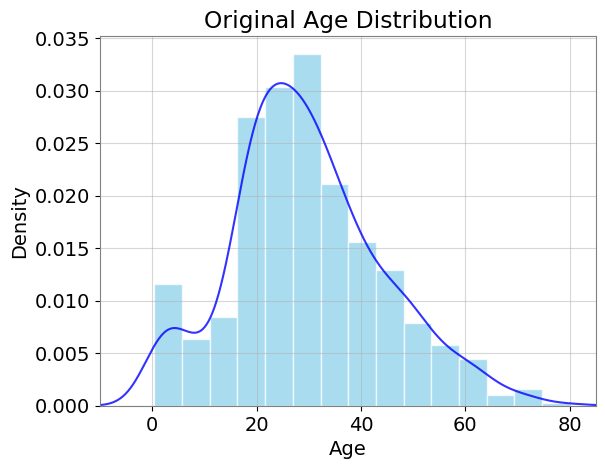

In [1159]:
# Visualize existing Age data using histogram

ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='skyblue', alpha=0.7, edgecolor='white')
train_df["Age"].plot(kind='density', color='blue', alpha=0.8, title = 'Original Age Distribution')
ax.set(xlabel='Age')

# Add light gridlines
plt.grid(alpha=0.5)

# Set outlines to white
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

ax.spines['left'].set_edgecolor('grey')
ax.spines['bottom'].set_edgecolor('grey')

plt.xlim(-10,85)
plt.show()


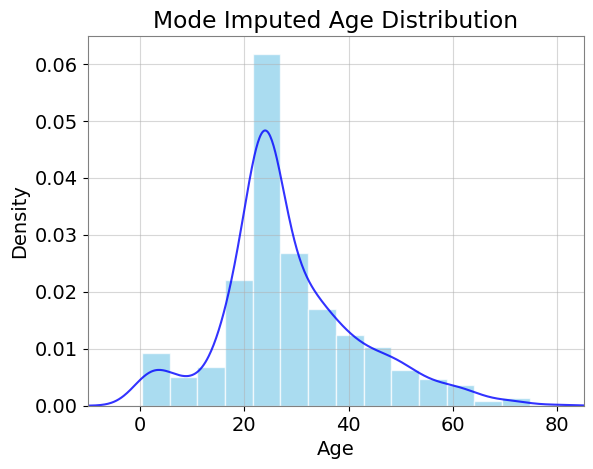

In [1160]:
# Mode imputation

train_df_mode = train_df.copy()
mode_imputer = SimpleImputer(strategy='most_frequent')
train_df_mode['Age'] = mode_imputer.fit_transform(train_df_mode[['Age']])

# visualize Age data after mean imputation
ax = train_df_mode["Age"].hist(bins=15, density=True, stacked=True, color='skyblue', alpha=0.7, edgecolor='white')
train_df_mode["Age"].plot(kind='density', color='blue', alpha=0.8, title = 'Mode Imputed Age Distribution')
ax.set(xlabel='Age')

# Add light gridlines
plt.grid(alpha=0.5)

# Set outlines to white
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

ax.spines['left'].set_edgecolor('grey')
ax.spines['bottom'].set_edgecolor('grey')

plt.xlim(-10,85)
plt.show()

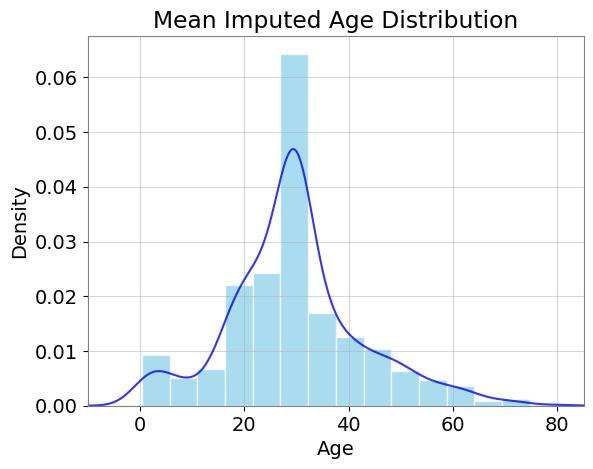

In [1161]:
# Mean imputation

train_df_mean = train_df.copy()
mean_imputer = SimpleImputer(strategy='mean')
train_df_mean['Age'] = mean_imputer.fit_transform(train_df_mean[['Age']])

# visualize Age data after mean imputation
ax = train_df_mean["Age"].hist(bins=15, density=True, stacked=True, color='skyblue', alpha=0.7, edgecolor='white')
train_df_mean["Age"].plot(kind='density', color='blue', alpha=0.8, title = 'Mean Imputed Age Distribution')
ax.set(xlabel='Age')

# Add light gridlines
plt.grid(alpha=0.5)

# Set outlines to white
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

ax.spines['left'].set_edgecolor('grey')
ax.spines['bottom'].set_edgecolor('grey')

plt.xlim(-10,85)
plt.show()

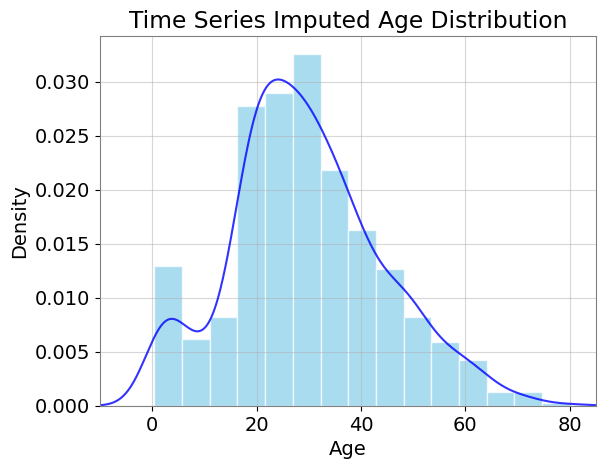

In [1162]:
# Time series imputation
# Using ffill method to fill missing values with next observed value
train_df_TSFF = train_df.copy()
train_df_TSFF['Age'] = train_df_TSFF['Age'].fillna(method='ffill')

# visualize Age data after TSI imputation
ax = train_df_TSFF["Age"].hist(bins=15, density=True, stacked=True, color='skyblue', alpha=0.7, edgecolor='white')
train_df_TSFF["Age"].plot(kind='density', color='blue', alpha=0.8, title = 'Time Series Imputed Age Distribution')
ax.set(xlabel='Age')

# Add light gridlines
plt.grid(alpha=0.5)

# Set outlines to white
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

ax.spines['left'].set_edgecolor('grey')
ax.spines['bottom'].set_edgecolor('grey')

plt.xlim(-10,85)
plt.show()

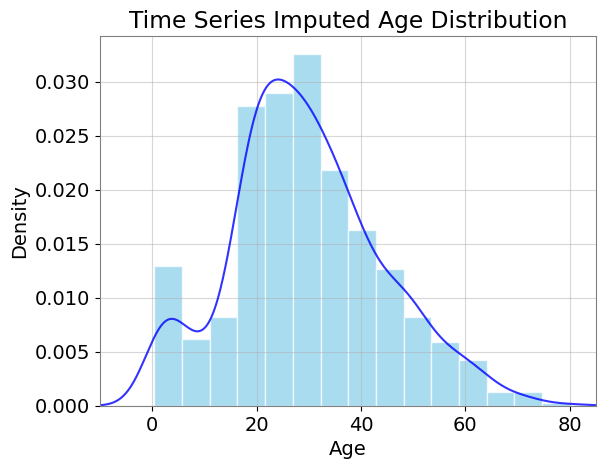

In [1163]:
# Apply Time series imputation to main dataframe
# Using ffill method to fill missing values with next observed value
train_df['Age'] = train_df['Age'].fillna(method='ffill')

# visualize Age data after TSI imputation
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='skyblue', alpha=0.7, edgecolor='white')
train_df["Age"].plot(kind='density', color='blue', alpha=0.8, title = 'Time Series Imputed Age Distribution')
ax.set(xlabel='Age')

# Add light gridlines
plt.grid(alpha=0.5)

# Set outlines to white
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

ax.spines['left'].set_edgecolor('grey')
ax.spines['bottom'].set_edgecolor('grey')

plt.xlim(-10,85)
plt.show()

In [1164]:
# show top 10 rows of train data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [1165]:
# Check to confirm no missing  values
train_df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Test data

In [1166]:
# Check for missing values in test data
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot: >

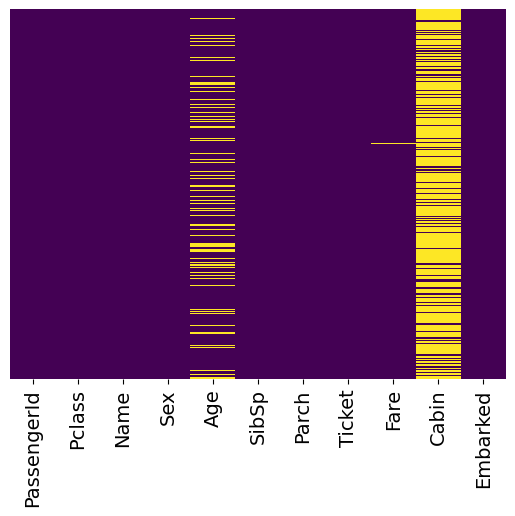

In [1167]:
# Visualize missing data and check for relationship with other variables
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap= 'viridis')

In [1168]:
# Check % of missing values
test_df.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [1169]:
# Remove Cabin column from test data
test_df.drop('Cabin', axis=1, inplace=True)


In [1170]:
# Remove missing values from Fare column from test data
test_df.dropna(inplace=True)

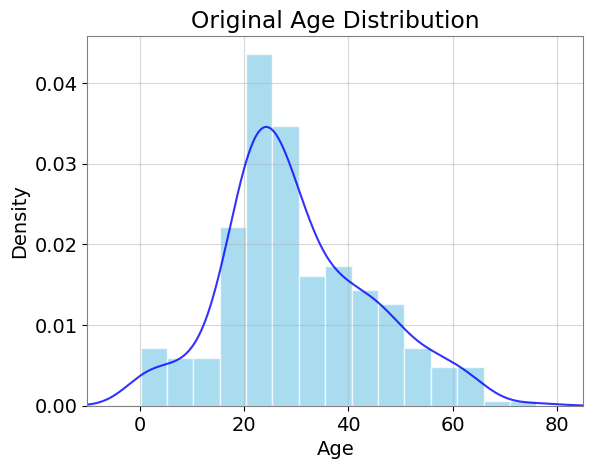

In [1171]:
# visualize original Age data
ax = test_df["Age"].hist(bins=15, density=True, stacked=True, color='skyblue', alpha=0.7, edgecolor='white')
test_df["Age"].plot(kind='density', color='blue', alpha=0.8, title = 'Original Age Distribution')
ax.set(xlabel='Age')

# Add light gridlines
plt.grid(alpha=0.5)

# Set outlines to white
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

ax.spines['left'].set_edgecolor('grey')
ax.spines['bottom'].set_edgecolor('grey')

plt.xlim(-10,85)
plt.show()

In [1172]:
# Apply Time series imputation to test dataframe

# Using ffill method to fill missing values with next observed value
test_df['Age'] = test_df['Age'].fillna(method='ffill')


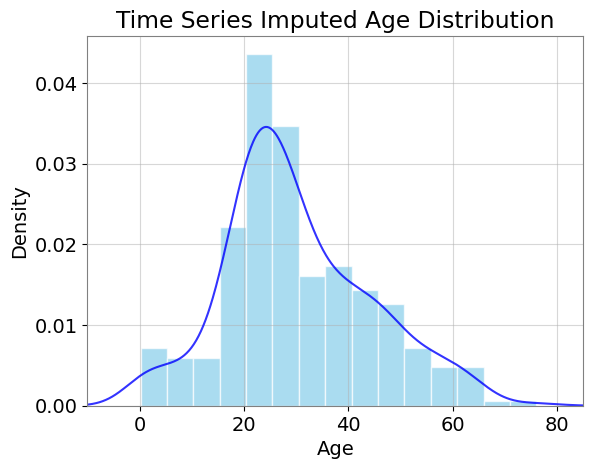

In [1173]:
# visualize Age data after TSI imputation
ax = test_df["Age"].hist(bins=15, density=True, stacked=True, color='skyblue', alpha=0.7, edgecolor='white')
test_df["Age"].plot(kind='density', color='blue', alpha=0.8, title = 'Time Series Imputed Age Distribution')
ax.set(xlabel='Age')

# Add light gridlines
plt.grid(alpha=0.5)

# Set outlines to white
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

ax.spines['left'].set_edgecolor('grey')
ax.spines['bottom'].set_edgecolor('grey')

plt.xlim(-10,85)
plt.show()

In [1174]:
# Check to confirm no missing  values
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1175]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [1176]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Pclass       331 non-null    int64  
 2   Name         331 non-null    object 
 3   Sex          331 non-null    object 
 4   Age          331 non-null    float64
 5   SibSp        331 non-null    int64  
 6   Parch        331 non-null    int64  
 7   Ticket       331 non-null    object 
 8   Fare         331 non-null    float64
 9   Embarked     331 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 28.4+ KB


In [1177]:
# drop ticket column
train_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)

# drop name col
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

# drop passenger id col
train_df.drop('PassengerId', axis=1, inplace=True)
test_df.drop('PassengerId', axis=1, inplace=True)


In [1178]:
# show top 10 rows of train data
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,35.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


C:\Users\ibmmo\AppData\Local\Temp\ipykernel_13272\941800424.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), cmap='YlGnBu')


<AxesSubplot: >

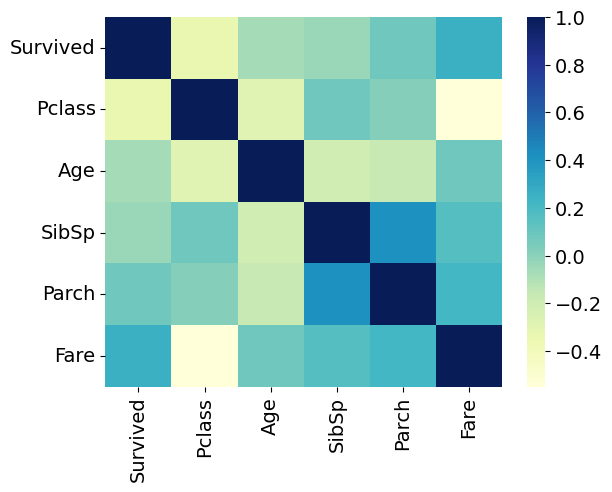

In [1179]:
# Check for correlation between variables
sns.heatmap(train_df.corr(), cmap='YlGnBu')

C:\Users\ibmmo\AppData\Local\Temp\ipykernel_13272\2563776996.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


<AxesSubplot: >

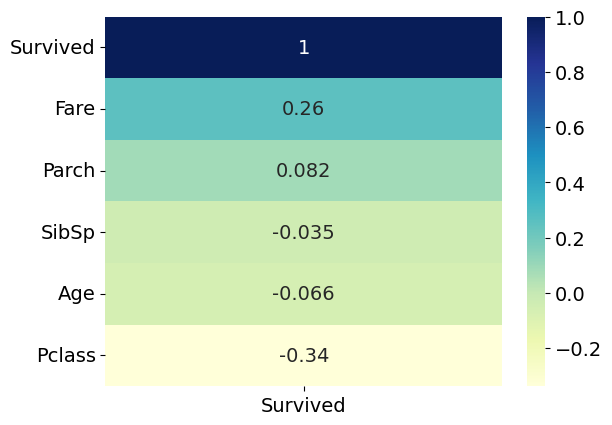

In [1180]:
# Show correlation between with 'survived'
corr_matrix = train_df.corr()
survived_corr = corr_matrix['Survived'].sort_values(ascending=False)
sns.heatmap(survived_corr.to_frame(), cmap='YlGnBu', annot=True)


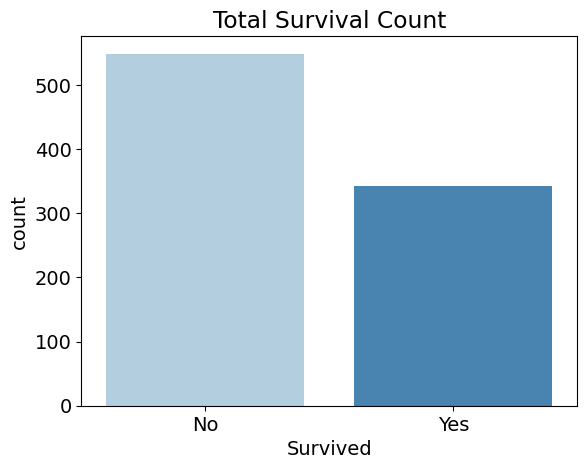

In [1181]:
sns.countplot(x='Survived', data=train_df, palette='Blues')
plt.title('Total Survival Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


Text(0.5, 1.0, 'Survival Count by Gender')

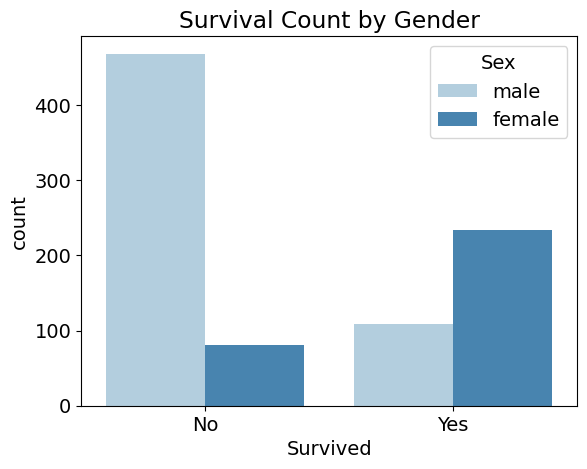

In [1182]:
# Survival count by gender
sns.countplot(x='Survived', data=train_df, hue='Sex', palette='Blues')
plt.xlabel('Survived')
plt.xticks([0,1],['No','Yes'])
plt.title('Survival Count by Gender')


Text(0, 0.5, 'Passenger Count')

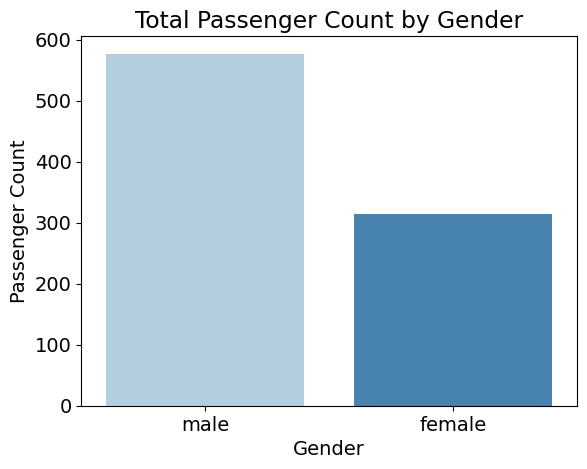

In [1183]:
sns.countplot(x='Sex', data=train_df, palette='Blues')
plt.title('Total Passenger Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Passenger Count')


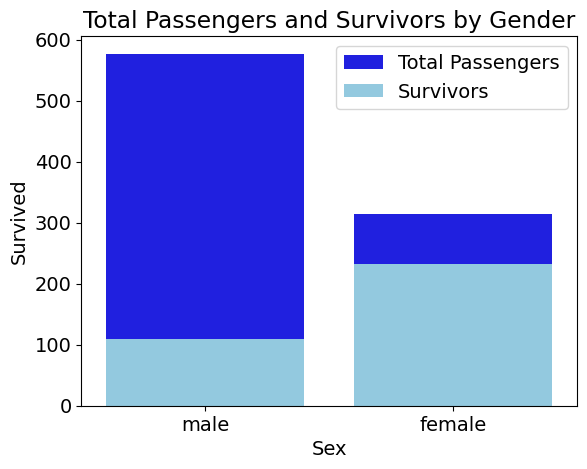

In [1184]:
# Count the number of passengers by sex
passengers_by_sex = train_df['Sex'].value_counts().reset_index()

# Rename the columns of the new dataframe
passengers_by_sex.columns = ['Sex', 'Total Passengers']

# Group by Sex and sum the number of Survived passengers for each gender
survivors_by_sex = train_df.groupby('Sex')['Survived'].sum().reset_index()

# Merge the two dataframes into one
merged = passengers_by_sex.merge(survivors_by_sex, on='Sex')

# Plot a bar chart with two bars for each gender
sns.barplot(x='Sex', y='Total Passengers', data=merged, color='blue', label='Total Passengers')
sns.barplot(x='Sex', y='Survived', data=merged, color='skyblue', label='Survivors')

plt.title('Total Passengers and Survivors by Gender')
plt.legend()


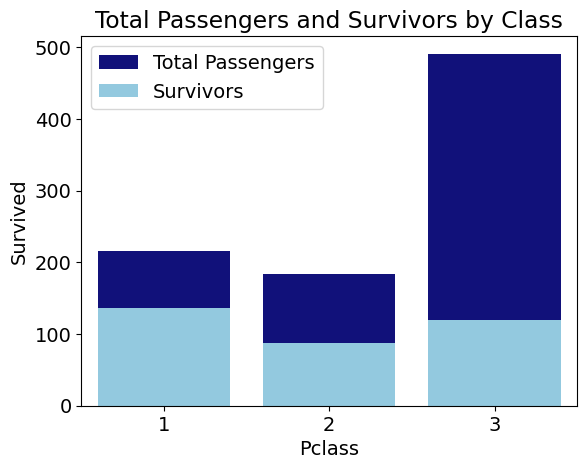

In [1185]:
# Count the number of passengers by sex
passengers_by_class = train_df['Pclass'].value_counts().reset_index()

# Rename the columns of the new dataframe
passengers_by_class.columns = ['Pclass', 'Total Passengers']

# Group by Sex and sum the number of Survived passengers for each gender
survivors_by_class = train_df.groupby('Pclass')['Survived'].sum().reset_index()

# Merge the two dataframes into one
merged = passengers_by_class.merge(survivors_by_class, on='Pclass')

# Plot a bar chart with two bars for each gender
sns.barplot(x='Pclass', y='Total Passengers', data=merged, color='darkblue', label='Total Passengers')
sns.barplot(x='Pclass', y='Survived', data=merged, color='skyblue', label='Survivors')

plt.title('Total Passengers and Survivors by Class')
plt.legend()


Text(0, 0.5, 'Survived Count')

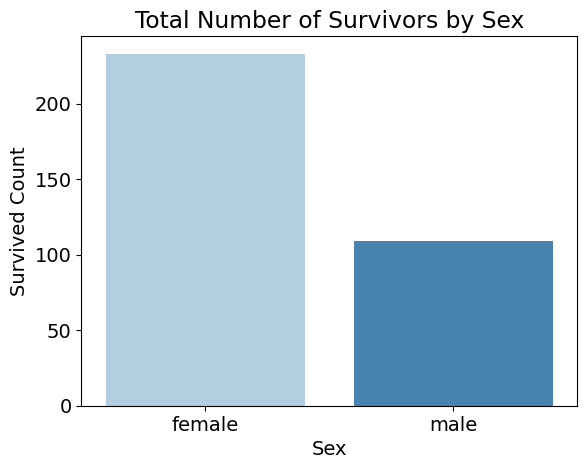

In [1186]:
# count total number of survivors by sex
survived_by_sex = train_df.groupby('Sex')['Survived'].sum().reset_index()

# plot bar chart of total number of survivors by sex
sns.barplot(x='Sex', y='Survived', data=survived_by_sex, palette='Blues')
plt.title('Total Number of Survivors by Sex')
plt.xlabel('Sex')
plt.ylabel('Survived Count')


Text(0.5, 1.0, 'Total Number of Survivors by Class')

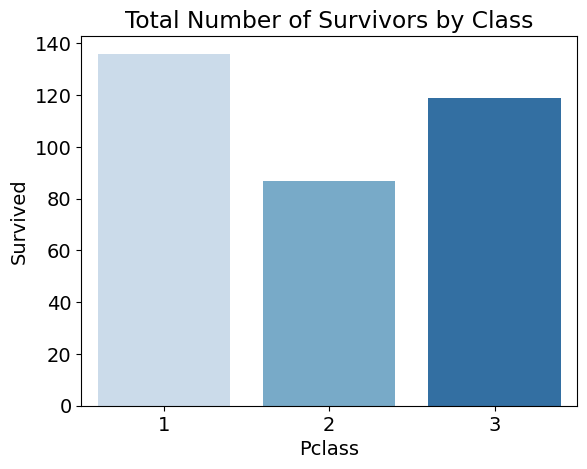

In [1187]:
# Group by Pclass and sum the number of Survived passengers for each class
survival_by_class = train_df.groupby('Pclass')['Survived'].sum().reset_index()

# Plot a bar chart of total number of survivors by class
sns.barplot(x='Pclass', y='Survived', data=survival_by_class, palette='Blues')

plt.title('Total Number of Survivors by Class')


In [1150]:
# convert sex column to numeric values
# Create new column for gender 
gender = pd.get_dummies(train_df['Sex'], drop_first=True)

In [1189]:
# Add new gender column to train_df
train_df['Gender'] = gender
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [1190]:
# Drop sex and embarked columns
train_df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [1191]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [1192]:
# convert sex column to numeric values
# Create new column for gender 
gender = pd.get_dummies(test_df['Sex'], drop_first=True)

In [1196]:
# Add new gender column to train_df
test_df['Gender'] = gender

In [1194]:

# Drop sex and embarked columns
test_df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [1198]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [1199]:
# Separate dependent and independent variables
x = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
y = train_df['Survived']



KeyError: 'Survived'

In [1219]:
# combine train and test data
combined_df = pd.concat([train_df, test_df], axis=0)

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']

x_train = combined_df.loc[:len(train_df)-1, features]
y_train = train_df['Survived']

x_test = combined_df[features]


In [1220]:
# Data modelling
from sklearn.model_selection import train_test_split

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)


In [1221]:
# Import logistic regression model
from sklearn.linear_model import LogisticRegression

# Create an instance of the model
lr = LogisticRegression()

# Fit the model to the training data

lr.fit(x_train, y_train)

LogisticRegression()

In [1222]:
# Predictions

predict = lr.predict(x_test)

# Check accuracy of model
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predict)

0.7821229050279329

In [702]:
# Model evaluation
# Import classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

pd.DataFrame(confusion_matrix(y_test, predict), columns=['Predicted Not Survived', 'Predicted Survived'], index=['Actual Not Survived', 'Actual Survived'])



,Predicted Not Survived,Predicted Survived
Actual Not Survived,130,24
Actual Survived,43,71


In [857]:
print (classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        99
           1       0.82      0.66      0.73        80

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



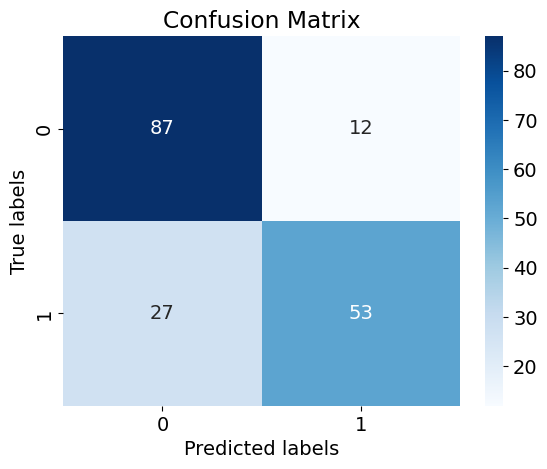

In [859]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# create confusion matrix
cm = confusion_matrix(y_test, predict)

# extract true positives value
tp = cm[1, 1]

# create heatmap with true positive value
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 14})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [856]:
# Model evaluation
# Import classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

confusion = pd.DataFrame(confusion_matrix(y_test, predict), columns=['Predicted Not Survived', 'Predicted Survived'], index=['Actual Not Survived', 'Actual Survived'])
confusion = confusion.rename_axis('True Labels').rename_axis('Predicted Labels', axis=1)
confusion.index = [f'True Negative (TN) {confusion.index[0]}', f'True Positive (TP) {confusion.index[1]}']
confusion.columns = [f'False Negative (FN) {confusion.columns[0]}', f'False Positive (FP) {confusion.columns[1]}']
print(confusion)


                                        False Negative (FN) Predicted Not Survived  \
True Negative (TN) Actual Not Survived                                          87   
True Positive (TP) Actual Survived                                              27   

                                        False Positive (FP) Predicted Survived  
True Negative (TN) Actual Not Survived                                      12  
True Positive (TP) Actual Survived                                          53  


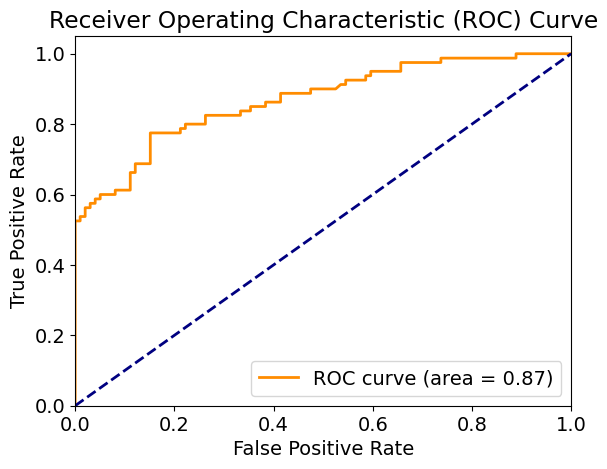

In [912]:
from sklearn.metrics import roc_curve, auc

# get predicted probabilities for the positive class
probs = lr.predict_proba(x_test)[:, 1]

# calculate fpr, tpr, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, probs)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [341]:
bins = [0, 4, 12, 19, 45, 80]
labels = ['0-4 (Infant)', '5-12 (Kid)', '13-19 (Teenager)', '20-45 (Adult)', '46-80 (Older Adult)']
train_df['Age'] = pd.cut(train_df['Age'], bins=bins, labels=labels)
pd.DataFrame(train_df['Age'].value_counts().sort_index())


,Age
0-4 (Infant),56
5-12 (Kid),36
13-19 (Teenager),119
20-45 (Adult),552
46-80 (Older Adult),128


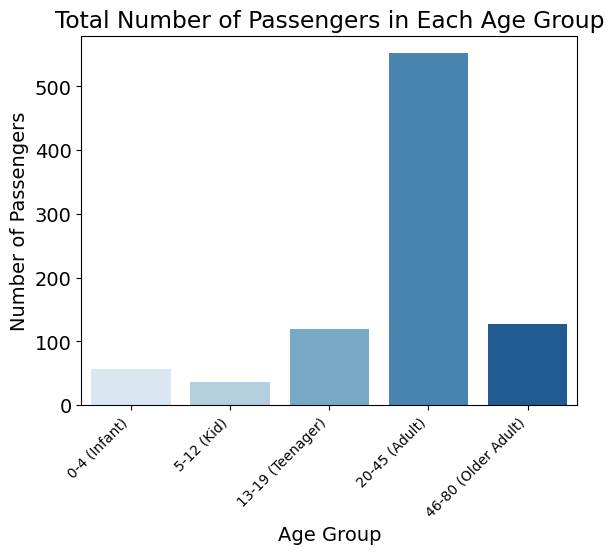

In [963]:
bins = [0, 4, 12, 19, 45, 80]
labels = ['0-4 (Infant)', '5-12 (Kid)', '13-19 (Teenager)', '20-45 (Adult)', '46-80 (Older Adult)']
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=bins, labels=labels)

# count number of passengers in each age group
age_counts = train_df['Age_Group'].value_counts().sort_index()

# plot bar chart
sns.barplot(x=age_counts.index, y=age_counts.values, palette='Blues')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Total Number of Passengers in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.show()


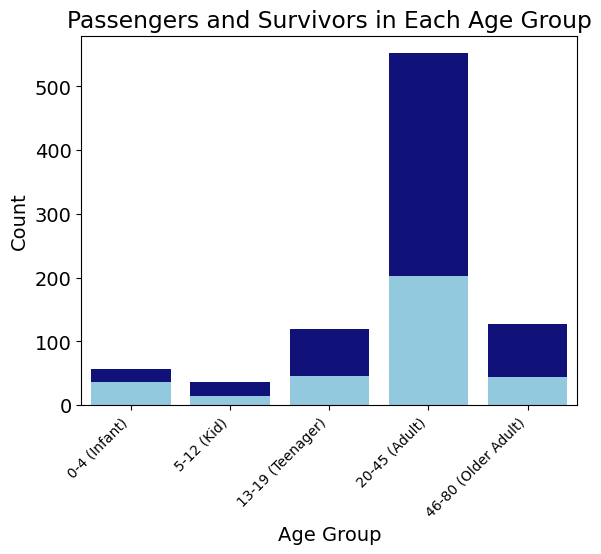

In [1032]:
bins = [0, 4, 12, 19, 45, 80]
labels = ['0-4 (Infant)', '5-12 (Kid)', '13-19 (Teenager)', '20-45 (Adult)', '46-80 (Older Adult)']
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=bins, labels=labels)

# count number of passengers and survivors in each age group
age_counts = train_df['Age_Group'].value_counts().sort_index()
survivor_counts = train_df.groupby('Age_Group')['Survived'].sum()

# plot bar chart
sns.barplot(x=age_counts.index, y=age_counts.values, color='darkblue')
sns.barplot(x=survivor_counts.index, y=survivor_counts.values, color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Passengers and Survivors in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


In [1202]:
# combine train and test data
combined_df = pd.concat([train_df, test_df], axis=0)

